In [1]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style>

# Dataquest - Data Analysis In Business <br/> <br/> Project Title: Popular Data Science Questions

## 1) Introduction

#### Background

Provided by: [Dataquest.io](https://www.dataquest.io/)

In this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

You're tasked with figuring out what is best content to write about. Because you took this course, you know that given the lack of instructions there's some leeway in what "best" means here.

Since you're passionate about helping people learn, you decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult [Stack Overflow](https://stackoverflow.com/) (a question and answer website about programming) and see what kind of content is more popular.

You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

## 2) Stack Exchange

Provided by: [Dataquest.io](https://www.dataquest.io/)

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and [data science](https://datascience.stackexchange.com/)!

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

#### Findings (Stack Exchange):

Tags are categorised in this site which may help us to review better what kind of data science questions are people more interested in.

## 3) Stack Exchange Data Explorer

Provided by: [Dataquest.io](https://www.dataquest.io/)

Stack Exchange provides a public data base for each of its websites. [Here's](https://data.stackexchange.com/datascience/query/new) a link to query and explore Data Science Stack Exchange's database.

More information is available about Stack Exchange Data Explorer (SEDE) on its [help section](https://data.stackexchange.com/help) and on this [tutorial link](https://data.stackexchange.com/tutorial).

We can run SQL queries using SEDE.

Note that SEDE uses a different dialect ([Transact-SQL](https://en.wikipedia.org/wiki/Transact-SQL) — Microsoft's SQL) than SQLite. For instance, the query below selects the top 10 results from a query.

```
SELECT TOP 10 *
  FROM tags
 ORDER BY Count DESC;
```

In SQLite we would not only use the keyword LIMIT instead of TOP we would also included it at the end of the query, instead of in the SELECT statement. [Here's](https://www.mssqltips.com/sqlservertip/4777/comparing-some-differences-of-sql-server-to-sqlite/) a helpful resource for navigating the differences.

#### Findings (Stack Exchange Data Explorer):

A brief search to have a feel of promising popular content on Data Science:

```
SELECT TOP 10 *
  FROM tags
 ORDER BY Count DESC;
```

<img src="top_10.png"> </img>

## 4) Getting The Data

Provided by: [Dataquest.io](https://www.dataquest.io/)

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

Columns | Description
--- | ---
Id| An identification number for the post.
PostTypeId| An identification number for the type of post.
CreationDate| The date and time of creation of the post.
Score| The post's score.
ViewCount| How many times the post was viewed.
Tags| What tags were used.
AnswerCount| How many answers the question got (only applicable to question posts).
FavoriteCount| How many times the question was [favored](https://meta.stackexchange.com/questions/53585/how-do-question-bookmarks-work) (only applicable to question posts).


**PostTypeId:**

<img src="post_type_id.png"> </img>

There are eight different types of post. Before we try to figure out which of them are relevant to us, let's check how many of them there are:

```
SELECT PostTypeId, COUNT(*) as NrOfPosts
  FROM posts
 GROUP BY PostTypeId
 ORDER BY 2 DESC;
```

<img src="post_type_query.png" style="width: 300px;"> </img>

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

For the purpose of this project exercise, we would be only interested in recent posts limited to the posts of 2019.

#### Findings (Getting The Data):

Run a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019.

We have downloaded the below query result into a csv file '2019_questions_query.csv' contained in this GitHub folder directory.

```
SELECT 
    Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
FROM
    Posts
WHERE
    CreationDate LIKE '%2019%'
    AND
    (PostTypeId = 1 OR PostTypeId = 2);
```

## 5) Exploring The Data:

In [2]:
# Read in the file into a dataframe.
import pandas as pd

df_2019 = pd.read_csv('2019_questions_query.csv', parse_dates=True)
df_2019.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,63868,1,2019-11-27 15:46:19,0,17.0,<deep-learning><dataset><image-classification>...,0.0,NaN
1,63869,2,2019-11-27 16:36:39,3,NaN,NaN,NaN,NaN
2,63870,2,2019-11-27 16:52:26,2,NaN,NaN,NaN,NaN
3,63871,2,2019-11-27 16:53:16,0,NaN,NaN,NaN,NaN
4,63872,1,2019-11-27 17:17:53,1,1467.0,<machine-learning><classification><xgboost>,1.0,NaN


In [3]:
# Explore the data.

# review datatypes
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462 entries, 0 to 14461
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             14462 non-null  int64  
 1   PostTypeId     14462 non-null  int64  
 2   CreationDate   14462 non-null  object 
 3   Score          14462 non-null  int64  
 4   ViewCount      6761 non-null   float64
 5   Tags           6761 non-null   object 
 6   AnswerCount    6761 non-null   float64
 7   FavoriteCount  1693 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 904.0+ KB


In [4]:
# review null values
print(df_2019.isnull().sum())


Id                   0
PostTypeId           0
CreationDate         0
Score                0
ViewCount         7701
Tags              7701
AnswerCount       7701
FavoriteCount    12769
dtype: int64


#### Findings (Exploring The Data):

There are 14,462 rows and 8 columns.

We may want to modify datatypes to suit our analysis (eg. **CreationDate** as datetime object).

There are 7,701 null values in 3 columns:
- **ViewCount**
- **Tags**
- **AnswerCount**

There are 12,769 null values in column **'FavoriteCount'**.

Tag column values seem to consist of value(s) encased in 'html' tags, ie. <>

## 6) Cleaning The Data:

The data is considered as quite clean, and we only need to modify it slightly to better fit our analysis purposes.

Let's work on the findings above.

In [5]:
# Fill in the missing values with 0.


df_2019 = df_2019.fillna(0)

# review transformation 
df_2019.isnull().sum()

Id               0
PostTypeId       0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

In [6]:
# setup datatypes for each column

# change to datetime object; input format example: '2019-11-27 15:46:19'
# datetime documentation: https://docs.python.org/3/library/datetime.html
import datetime as dt

def parse_datetime(dt_input):
    output = dt.datetime.strptime(dt_input, '%Y-%m-%d %H:%M:%S')
    return output

df_2019['CreationDate'] = df_2019['CreationDate'].apply(parse_datetime)


# change dtype to int for following columns
cols = ['ViewCount', 'AnswerCount', 'FavoriteCount']
df_2019[cols] = df_2019[cols].astype(int)

# review transformation
print(df_2019.info())
df_2019['CreationDate'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462 entries, 0 to 14461
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             14462 non-null  int64         
 1   PostTypeId     14462 non-null  int64         
 2   CreationDate   14462 non-null  datetime64[ns]
 3   Score          14462 non-null  int64         
 4   ViewCount      14462 non-null  int64         
 5   Tags           14462 non-null  object        
 6   AnswerCount    14462 non-null  int64         
 7   FavoriteCount  14462 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 904.0+ KB
None


0   2019-11-27 15:46:19
1   2019-11-27 16:36:39
2   2019-11-27 16:52:26
3   2019-11-27 16:53:16
4   2019-11-27 17:17:53
Name: CreationDate, dtype: datetime64[ns]

In [7]:
# replace the tag column content for easier string data manipulation
# ie. change seperators from '<' and '>' to ',' instead

# review values before transformation
print('Before Transformation:\n')
print(df_2019['Tags'].value_counts(), '\n')

# transform
df_2019['Tags'] = df_2019['Tags'].str.replace('<', '').str.replace('>', ',')
df_2019['Tags'] = df_2019['Tags']
df_2019['Tags'] = df_2019['Tags'].fillna('0')  # fill na for this column again

# review transformation
print('After Transformation:\n')
print(df_2019['Tags'].value_counts(), '\n')
print(df_2019.info(), '\n')
print(df_2019.isnull().sum(), '\n')
df_2019['Tags'].head()

Before Transformation:

0                                                                                7701
<machine-learning>                                                                 86
<python><pandas>                                                                   52
<python>                                                                           41
<nlp>                                                                              36
                                                                                 ... 
<machine-learning><neural-network><regression><autoencoder><vae>                    1
<machine-learning><classification><cross-validation><confusion-matrix><smote>       1
<data><3d-reconstruction><cloud>                                                    1
<machine-learning><python><classification><feature-selection>                       1
<machine-learning><neural-network><keras><scikit-learn>                             1
Name: Tags, Length: 5073, dtyp

0    deep-learning,dataset,image-classification,tra...
1                                                    0
2                                                    0
3                                                    0
4             machine-learning,classification,xgboost,
Name: Tags, dtype: object

In [8]:
# get list of available tags from the column 'tags'


# split tags into multiple columns
tags = df_2019['Tags'].str.split(',', expand=True)

# melt the different columns into single column
tags = pd.melt(frame=tags, value_vars=[0, 1, 2, 3, 4, 5])

# drop unneeded column
tags.drop(labels='variable', axis=1, inplace=True)

# review transformation
tags
print(tags.value_counts())

value            
0                    7701
                     6761
machine-learning     2129
python               1440
deep-learning         895
                     ... 
community               1
domain-adaptation       1
aws-lambda              1
tesseract               1
julia                   1
Length: 490, dtype: int64


In [9]:
# drop duplicate tags
tag_list = tags.drop_duplicates()

# reset index
tag_list.reset_index(drop=True, inplace=True)

# review transformation: tag_list is a list of unique tags
tag_list

,value
0,deep-learning
1,0
2,machine-learning
3,python
4,gradient-descent
...,...
486,normal-equation
487,f1score
488,catboost
489,mean-shift


## 7) Most Used And Most Viewed

Provided by: [Dataquest.io](https://www.dataquest.io/)

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

In [10]:
# Count how many times each tag was used.


# review tags frequency table from previous transformation
# since top 2 values are meaningless, don't include them
print('Count how many times each tag was used:')
print(tags.value_counts()[2:])

Count how many times each tag was used:
value            
machine-learning     2129
python               1440
deep-learning         895
neural-network        819
keras                 707
                     ... 
community               1
domain-adaptation       1
aws-lambda              1
tesseract               1
julia                   1
Length: 488, dtype: int64


In [11]:
# Count how many times each tag was viewed.
# use the list of tag list with unique values from previous transformation

# consider to use regex search using pattern = tag from tag_list, and search source from df_2019
# thereafter incremental the viewcounts if each row's tag value from df_2019 contains that specific tag

import re

def extract_tag_view_count(tag):
    df_2019['Tags_new'] = ',' + df_2019['Tags']  # create new column - add comma to first char of every tag for regex search purposes
    if str(tag) == None:
        pass      
    elif str(tag) != None:
        pattern = re.escape(',' + str(tag) + ',')
        tag_view = df_2019[df_2019['Tags_new'].str.contains(pattern)].sum()['ViewCount']
        return tag_view
    else:
        return None
    df_2019.drop(labels='Tags_new', axis=1, inplace=True)  # drop the new column created for regex purposes

tag_list['tag_views'] = tag_list['value']
tag_list['tag_views'] = tag_list['tag_views'].apply(extract_tag_view_count)
tag_list.sort_values(by='tag_views', ascending=False, inplace=True)
tag_list

<ipython-input-11-f25996479215>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_list['tag_views'] = tag_list['value']
<ipython-input-11-f25996479215>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_list['tag_views'] = tag_list['tag_views'].apply(extract_tag_view_count)
<ipython-input-11-f25996479215>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,value,tag_views
3,python,2763454.0
2,machine-learning,1837131.0
31,pandas,1321319.0
11,keras,1156841.0
0,deep-learning,1045520.0
...,...,...
476,doc2vec,17.0
290,state-of-the-art,17.0
1,0,0.0
230,None,0.0


In [12]:
# drop 1st row and last 2 rows as it represents no tags
tag_list.drop(labels=[231, 230, 1], axis=0, inplace=True)
tag_list.reset_index(drop=True, inplace=True)
tag_list['tag_views'] = tag_list['tag_views'].astype(int)


# review transformation
print(tag_list.dtypes)
tag_list

value        object
tag_views     int64
dtype: object


/Users/humphreytan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-12-1205158eb105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_list['tag_views'] = tag_list['tag_views'].astype(int)


,value,tag_views
0,python,2763454
1,machine-learning,1837131
2,pandas,1321319
3,keras,1156841
4,deep-learning,1045520
...,...,...
483,consumerweb,28
484,caffe,24
485,relational-dbms,18
486,doc2vec,17


In [13]:
# Count how many times each tag was used.
# combine both tag count and tag views into same dataframe for ease of data visualisation

def extract_tag_post_count(tag):
    df_2019['Tags_new'] = ',' + df_2019['Tags']  # create new column - add comma to first char of every tag for regex search purposes
    if str(tag) == None or str(tag) == 0:
        pass
    elif str(tag) != None:
        pattern = ',' + re.escape(str(tag) + ',')
        tag_count = df_2019[df_2019['Tags_new'].str.contains(pattern)].count()[0]
        return tag_count
    else:
        return None
    df_2019.drop(labels='Tags_new', axis=1, inplace=True)  # drop the new column created for regex purposes
    
tag_list['tag_count'] = tag_list['value']
tag_list['tag_count'] = tag_list['tag_count'].apply(extract_tag_post_count)
tag_list.sort_values(by='tag_count', ascending=False, inplace=True)

# review transformation
# top 5 tag count is consistent with above top 5 in value_counts frequency table, hence custom function's potential error minimised via counter-checking.
print(tag_list.dtypes)
tag_list

<ipython-input-13-9eb41985c15c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_list['tag_count'] = tag_list['value']


value        object
tag_views     int64
tag_count     int64
dtype: object


<ipython-input-13-9eb41985c15c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_list['tag_count'] = tag_list['tag_count'].apply(extract_tag_post_count)
<ipython-input-13-9eb41985c15c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_list.sort_values(by='tag_count', ascending=False, inplace=True)


,value,tag_views,tag_count
1,machine-learning,1837131,2129
0,python,2763454,1440
4,deep-learning,1045520,895
5,neural-network,922025,819
3,keras,1156841,707
...,...,...,...
135,kendalls-tau-coefficient,25250,1
136,spearmans-rank-correlation,25250,1
407,lime,468,1
404,naive-bayes-algorithim,495,1


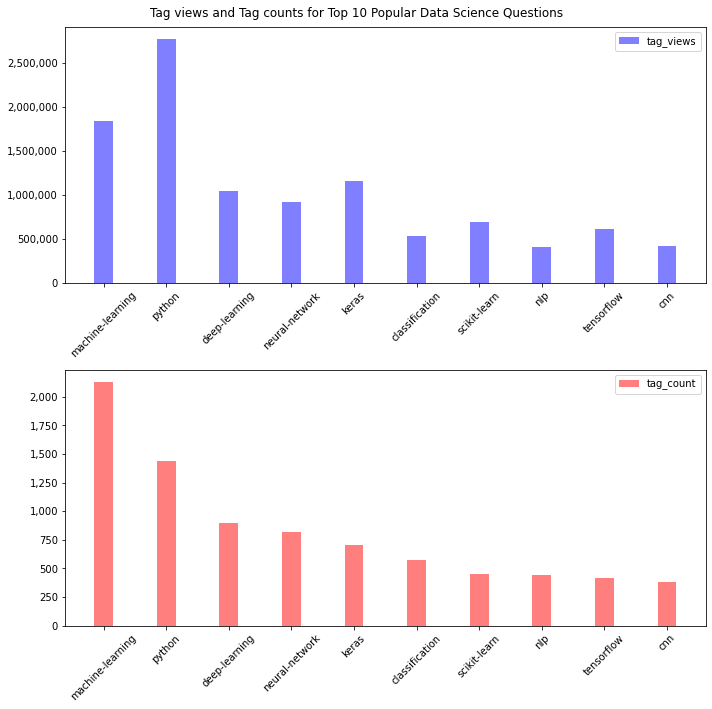

In [14]:
# Create simple visualizations or the top tags of the above results.
# let's use a bar charts since we are dealing with discrete frequencies and category is norminal with no particular inherent ranking sequence to each category 


# since there are so many tags, let us just visualise the top 10 in terms of tag count

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter  
# to format axis values
# source: https://pretagteam.com/question/matplotlib-comma-separated-number-format-for-axis


# create chart layout
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax1.bar(x=np.arange(0,10,1), height=tag_list[:10]['tag_views'], width=0.3, alpha=0.5, label='tag_views', color='blue')
ax2.bar(x=np.arange(0,10,1), height=tag_list[:10]['tag_count'], width=0.3, alpha=0.5, label='tag_count', color='red')

ax1.set_xticks(np.arange(0,10,1))
ax1.set_xticklabels(tag_list[:10]['value'], rotation=45)

ax2.set_xticks(np.arange(0,10,1))
ax2.set_xticklabels(tag_list[:10]['value'], rotation=45)

# format y-axis tick labels
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

fig.suptitle('Tag views and Tag counts for Top 10 Popular Data Science Questions', fontsize=12)
plt.tight_layout()
ax1.legend()
ax2.legend()
plt.show() 

## 8) Relations Between Tags

We can plot correlations between tags where they exist in the same post, or we can also consider to apply domain knowledge (ie. the topic of 'Data Science' for this project purposes) to think about the relations between tags in order to progress towards the project objective better.

It could be an effective use of corporate resources if we come out with suggestions to tackle Data Science topics with multiple popular tags at the same time, in accordance to our project objective - to come out with a direction to write the 'best' data science content.

## 9) Enter Domain Knowledge

Let's try to find out more domain knowledge about each tag at the [Tag Page on DSSE](https://datascience.stackexchange.com/tags).

It seems that the top 10 popular tags are closely associated with deep-learning and machine-learning!

## 10) Just A Fad?

Provided by: [Dataquest.io](https://www.dataquest.io/)

One concern is that the 'hot' topic today may not be the 'hot' topic of tomorrow, trends often come and go.

Could our findings itself be a fad?

Let's try to find out more about deep-learning to see if there is additional supporting evidence that this trend of interest in deep-learning would be long-lasting.

Let us extract another dataset using SQL from [DSSE](https://data.stackexchange.com/datascience/query/new). We have downloaded the below query result into a csv file **'all_questions_query.csv'** contained in this GitHub folder directory. 

```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

In this we will track the interest in deep learning across time. We will:
- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.


In [15]:
# Read the file all_questions.csv into a dataframe.

df_all_qns = pd.read_csv('all_questions_query.csv')
df_all_qns.head()

,Id,CreationDate,Tags
0,103536,2021-10-27 02:54:57,<nlp><python-3.x><text-classification><topic-m...
1,103537,2021-10-27 04:23:25,<scikit-learn>
2,103539,2021-10-27 04:57:38,<classification><time-series><regression><anom...
3,103541,2021-10-27 06:17:33,<python><nlp><data-science-model>
4,103543,2021-10-27 07:28:01,<scikit-learn><xgboost>


In [16]:
# Transform the columns in a similar manner to what was previously done, in accordance with how we want to define our analysis.

def parse_datetime(dt_input):
    output = dt.datetime.strptime(dt_input, '%Y-%m-%d %H:%M:%S')
    return output

df_all_qns['CreationDate'] = df_all_qns['CreationDate'].apply(parse_datetime)

print(df_all_qns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31289 entries, 0 to 31288
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            31289 non-null  int64         
 1   CreationDate  31289 non-null  datetime64[ns]
 2   Tags          31289 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 733.5+ KB
None


In [17]:
# We can try to loosely define 'deep-learning' questions as those top 10 tags that we have identified earlier.

deep_learning_tags = list(tag_list[:10]['value'])
print(deep_learning_tags,'\n')

# say if each question tag includes one of these deep-learning tags, we count that question as a relevant question, else not a relevant question

def deep_qns_label(tag):
    for deep_tag in deep_learning_tags:
        pattern = '<' + re.escape(str(deep_tag) + '>')
        if re.search(pattern, tag):
            return 1
        else:
            pass

df_all_qns['deep_qns'] = df_all_qns['Tags']
df_all_qns['deep_qns'] = df_all_qns['deep_qns'].apply(deep_qns_label)
df_all_qns['deep_qns'].fillna(0, inplace=True)

# review transformation
print(df_all_qns['deep_qns'].value_counts(dropna=False))
df_all_qns

['machine-learning', 'python', 'deep-learning', 'neural-network', 'keras', 'classification', 'scikit-learn', 'nlp', 'tensorflow', 'cnn'] 

1.0    21768
0.0     9521
Name: deep_qns, dtype: int64


,Id,CreationDate,Tags,deep_qns
0,103536,2021-10-27 02:54:57,<nlp><python-3.x><text-classification><topic-m...,1.0
1,103537,2021-10-27 04:23:25,<scikit-learn>,1.0
2,103539,2021-10-27 04:57:38,<classification><time-series><regression><anom...,1.0
3,103541,2021-10-27 06:17:33,<python><nlp><data-science-model>,1.0
4,103543,2021-10-27 07:28:01,<scikit-learn><xgboost>,1.0
...,...,...,...,...
31284,40901,2018-11-08 06:44:06,<computer-vision><opencv>,0.0
31285,40906,2018-11-08 09:06:13,<cnn><pytorch>,1.0
31286,40916,2018-11-08 12:23:20,<classification><scikit-learn><dataset><class-...,1.0
31287,40918,2018-11-08 13:00:08,<machine-learning><neural-network><deep-learni...,1.0


In [18]:
# for simplicity, let's create new datetime category based on month-year, and we summarise the number of deep qns, non-deep qns, and the proportions which we can use for our later visualisation


# we can use format the time to create new category
# multiply year by 100, to create 2 extra positions to place in 2-digit months
df_all_qns['year_mth'] = df_all_qns['CreationDate'].dt.year * 100 + df_all_qns['CreationDate'].dt.month

# review transformation


# aggregate by yearmth and get the summary statistics for 'deep_qns'
pt_deep_qns = df_all_qns.pivot_table(index='year_mth', values=['deep_qns'], aggfunc=[np.sum, np.size])

# review transformation
pt_deep_qns

,sum,size
,deep_qns,deep_qns
year_mth,,
201405,17.0,58.0
201406,47.0,99.0
201407,42.0,76.0
201408,32.0,64.0
201409,26.0,48.0
...,...,...
202107,372.0,551.0
202108,365.0,545.0


In [19]:
# aggregate by yearmth and get the summary statistics for 'deep_qns'
pt_deep_qns = df_all_qns.pivot_table(index='year_mth', values=['deep_qns'], aggfunc=[np.sum, np.size])

# review transformation
print(pt_deep_qns.columns)
print(pt_deep_qns)

# drop multi-indexed columns and rename them
pt_deep_qns = pt_deep_qns.droplevel(level=1, axis=1)

# create new column - percentage
pt_deep_qns['percentage'] = round(pt_deep_qns['sum'] / pt_deep_qns['size'] * 100, 1)

# reset index
pt_deep_qns = pt_deep_qns.reset_index(drop=False)

# turn year-mth dtype to string for plotting purposes
pt_deep_qns['year_mth'] = pt_deep_qns['year_mth'].astype(str)

# as this analysis is conducted on Nov 2021, let's drop the month of Nov 2021 from our analysis so as not to skew the results
pt_deep_qns = pt_deep_qns[:-1]

# review transformation
pt_deep_qns

MultiIndex([( 'sum', 'deep_qns'),
            ('size', 'deep_qns')],
           )
              sum     size
         deep_qns deep_qns
year_mth                  
201405       17.0     58.0
201406       47.0     99.0
201407       42.0     76.0
201408       32.0     64.0
201409       26.0     48.0
...           ...      ...
202107      372.0    551.0
202108      365.0    545.0
202109      340.0    503.0
202110      319.0    500.0
202111      164.0    262.0

[91 rows x 2 columns]


,year_mth,sum,size,percentage
0,201405,17.0,58.0,29.3
1,201406,47.0,99.0,47.5
2,201407,42.0,76.0,55.3
3,201408,32.0,64.0,50.0
4,201409,26.0,48.0,54.2
...,...,...,...,...
85,202106,376.0,558.0,67.4
86,202107,372.0,551.0,67.5
87,202108,365.0,545.0,67.0
88,202109,340.0,503.0,67.6


In [20]:
# create new x-axis date labels for plotting purposes to prevent overcrowding
# slice the year-mth column by filtering every nth element to create new numpy array
# syntex - panda numpy slicing: [rows:cols:step] - adjust the number of steps to prevent overcrowding via trial and error during plotting
year_mth_labels = pt_deep_qns['year_mth'][0:len(pt_deep_qns['year_mth']):4]
year_mth_labels

0     201405
4     201409
8     201501
12    201505
16    201509
20    201601
24    201605
28    201609
32    201701
36    201705
40    201709
44    201801
48    201805
52    201809
56    201901
60    201905
64    201909
68    202001
72    202005
76    202009
80    202101
84    202105
88    202109
Name: year_mth, dtype: object

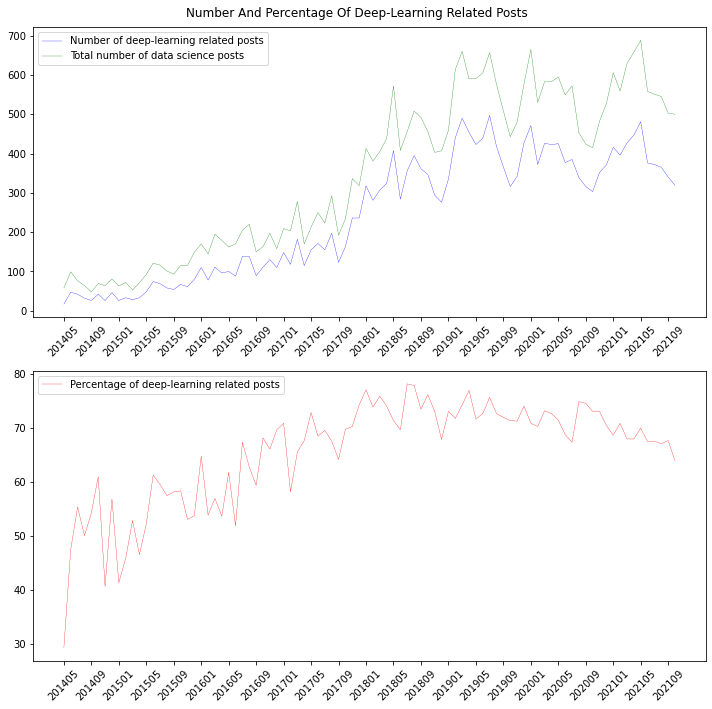

In [21]:
# data visualisation


# create chart layout
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax1.plot(pt_deep_qns['year_mth'], pt_deep_qns['sum'], linewidth=0.3, alpha=1, label='Number of deep-learning related posts', color='blue')
ax1.plot(pt_deep_qns['year_mth'], pt_deep_qns['size'], linewidth=0.3, alpha=1, label='Total number of data science posts', color='green')
ax2.plot(pt_deep_qns['year_mth'], pt_deep_qns['percentage'], linewidth=0.3, alpha=1, label='Percentage of deep-learning related posts', color='red')

ax1.set_xticks(year_mth_labels)
ax1.set_xticklabels(year_mth_labels, rotation=45)

ax2.set_xticks(year_mth_labels)
ax2.set_xticklabels(year_mth_labels, rotation=45)

# format y-axis tick labels
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

fig.suptitle('Number And Percentage Of Deep-Learning Related Posts', fontsize=12)
plt.tight_layout()
ax1.legend()
ax2.legend()
plt.show() 

#### Findings (Just A Fad?):

The interest in deep-learning related post remain strong at over 60% as at Oct 2021 in our analysis, it doesn't seem like interest in data science and deep-learning is weakening!

## 11) Conclusion

#### Key skills applied in project:
- Explored the business context in which data science happens.

#### Potential next steps:
- What other content can we recommend that isn't as popular? Perhaps can try using association rules / correlations to find strong relations between tags.
- What other popularity features could we include in our analysis? Perhaps scores and favourite counts?
- We focused on DSSE. How could we use other related sites to help us with our goal?
- How can we leverage other sites to determine what non-data-science content to write about? For example, is there some mathematical field that leads to more questions than others?
